## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [3]:
import os
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input
from keras.utils import to_categorical

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = cifar10.load_data()

In [5]:
x_train, y_train = train
img_shape = x_train.shape[1:]
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# # Flatten the images
# x_train = x_train.reshape((len(x_train), -1))
# x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
def build_mlp():
    """
    Try to build your own model
    """
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=img_shape, padding='same'))
    model.add(MaxPool2D())
    model.add(Conv2D(filters=60, kernel_size=(3, 3), padding='same'))
    model.add(MaxPool2D())
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

def build_cnn():
    input_layer = Input(shape=img_shape)
    nn_layer = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_layer)
    nn_layer = MaxPool2D()(nn_layer)
    nn_layer = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(nn_layer)
    nn_layer = MaxPool2D()(nn_layer)
    nn_layer = Flatten()(nn_layer)
    nn_layer = Dense(512, activation='relu')(nn_layer)
    nn_layer = Dense(512, activation='relu')(nn_layer)
    output = Dense(10, activation='softmax')(nn_layer)
    
    model = Model(inputs=[input_layer], outputs=[output])
    
    return model
    
#model = build_mlp()
#print(model.summary())

model = build_cnn()
print(cnn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1049088   
__________

In [11]:
"""
Compile your model
"""
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=10, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 33s 650us/step - loss: 1.5005 - acc: 0.4631 - val_loss: 1.3356 - val_acc: 0.5215
Epoch 2/10
50000/50000 [==============================] - 32s 646us/step - loss: 1.0923 - acc: 0.6132 - val_loss: 1.0958 - val_acc: 0.6114
Epoch 3/10
50000/50000 [==============================] - 32s 648us/step - loss: 0.8845 - acc: 0.6896 - val_loss: 0.9798 - val_acc: 0.6521
Epoch 4/10
50000/50000 [==============================] - 33s 653us/step - loss: 0.7426 - acc: 0.7397 - val_loss: 0.9494 - val_acc: 0.6683
Epoch 5/10
50000/50000 [==============================] - 32s 646us/step - loss: 0.6013 - acc: 0.7912 - val_loss: 0.9131 - val_acc: 0.6921
Epoch 6/10
50000/50000 [==============================] - 34s 678us/step - loss: 0.4642 - acc: 0.8383 - val_loss: 0.9778 - val_acc: 0.6859
Epoch 7/10
50000/50000 [==============================] - 33s 657us/step - loss: 0.3376 - acc: 0.8849 - val_loss: 1.

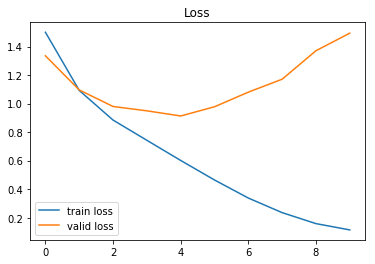

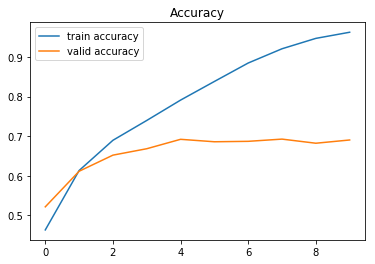

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()